In [ ]:
# Import Lybraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read csv File
df=pd.read_csv('pronostico_dataset (1).csv')
df

,ID;age;systolic_bp;diastolic_bp;cholesterol;prognosis
0,0;77.196339508802097;85.288742418610894;80.021...
1,1;63.5298502234171;99.379735822841894;84.85236...
2,2;69.003986220296298;111.349455002811;109.8506...
3,3;82.638209813584396;95.056127546033593;79.666...
4,4;78.346285672257494;109.154590823354;90.71322...
...,...
5995,5995;49.611850239536302;94.857639409400207;86....
5996,5996;63.099686031701999;100.039527119618;93.51...
5997,5997;55.562242769599898;98.421446235450603;102...
5998,5998;63.468956315401201;106.809288900789;88.06...


In [ ]:
# In above Dataset there is challenge
# Columns in  dataset are not separated , we Read the entire row as a single column
# So  we need to correct it


In [ ]:
# Reads the CSV file again

df = pd.read_csv('pronostico_dataset (1).csv', sep=';') #use a semicolon (;) as the separator between column

display(df.head()) #loads the data into a DataFrame where each column is seprated

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,0,77.196340,85.288742,80.021878,79.957109,retinopathy
1,1,63.529850,99.379736,84.852361,110.382411,retinopathy
2,2,69.003986,111.349455,109.850616,100.828246,retinopathy
3,3,82.638210,95.056128,79.666851,87.066303,retinopathy
4,4,78.346286,109.154591,90.713220,92.511770,retinopathy


In [ ]:

# Data Set Details:

# 1)ID: Unique id for each patient

# 2)Age: Represent age of the patient.

# 3)systolic_bp: Represent Systolic blood pressure (upper value in a BP reading ,normal range: below 120mmHg).


# 4)diastolic_bp: Represent Systolic blood pressure (lower value in a BP reading, normal range: lower than 80mmHg)

# 5)cholesterol: Reprsent cholestol level (normal range: between 125 and 200 mg/dl)

# 6)prognosis: Represent the diagnosis of the patient.




In [ ]:
#check data type of each column
print("Dataset information:\n")

df.info()

Dataset information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            6000 non-null   int64  
 1   age           6000 non-null   float64
 2   systolic_bp   6000 non-null   float64
 3   diastolic_bp  6000 non-null   float64
 4   cholesterol   6000 non-null   float64
 5   prognosis     6000 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 281.4+ KB


In [ ]:
# By looking data type of Age , systolic_bp , diastolic_bp ,cholesterol
# Age comes in float which should be in int datatype
# systolic_bp , diastolic_bp ,cholesterol are not expressed as floating-point numbers
#  Instead, the measurements are usually whole numbers or integers, representing millimeters of mercury (mmHg) and  millimoles per liter (mmol/L)


In [ ]:
# change datatype
print("\n Dataset information After changed Datatype:\n")
df['age'] = df['age'].astype(int)
df['systolic_bp'] = df['systolic_bp'].astype(int)
df['diastolic_bp'] = df['diastolic_bp'].astype(int)
df['cholesterol'] = df['cholesterol'].astype(int)

display(df.info())



 Dataset information After changed Datatype:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            6000 non-null   int64 
 1   age           6000 non-null   int64 
 2   systolic_bp   6000 non-null   int64 
 3   diastolic_bp  6000 non-null   int64 
 4   cholesterol   6000 non-null   int64 
 5   prognosis     6000 non-null   object
dtypes: int64(5), object(1)
memory usage: 281.4+ KB


None

In [ ]:
#checking Dataset shape
print("Datasset shape:",df.shape)

Datasset shape: (6000, 6)


In [ ]:
# checking for any null value
df.isnull().sum()


,0
ID,0
age,0
systolic_bp,0
diastolic_bp,0
cholesterol,0
prognosis,0


In [ ]:
#check for any duplicate row
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [ ]:
#There is no null value and duplicate row in Dataset

In [ ]:
# Drop the ID column (It's not important)
df = df.drop('ID', axis=1)
print("Dataset After Droping ID:\n",df.head())

Dataset After Droping ID:
    age  systolic_bp  diastolic_bp  cholesterol    prognosis
0   77           85            80           79  retinopathy
1   63           99            84          110  retinopathy
2   69          111           109          100  retinopathy
3   82           95            79           87  retinopathy
4   78          109            90           92  retinopathy


In [ ]:
# Summary statistics for numerical columns
print("\nSummary statistics :")
print(df.describe())


Summary statistics :
               age  systolic_bp  diastolic_bp  cholesterol
count  6000.000000  6000.000000   6000.000000  6000.000000
mean     59.965167   100.195667     89.998833   100.123167
std       8.566301    10.676518      9.653895    10.433926
min      35.000000    69.000000     62.000000    69.000000
25%      54.000000    93.000000     83.000000    93.000000
50%      59.000000   100.000000     89.000000   100.000000
75%      65.000000   107.000000     96.000000   107.000000
max     103.000000   151.000000    133.000000   148.000000


In [ ]:
print("\nMedian of numerical columns:")
print(df.select_dtypes(include=np.number).median())


Median of numerical columns:
age              59.0
systolic_bp     100.0
diastolic_bp     89.0
cholesterol     100.0
dtype: float64


In [ ]:
# checking value count of prognosis
df["prognosis"].value_counts()

,count
prognosis,
retinopathy,3087
no_retinopathy,2913


In [ ]:
# The mean and median values for all numerical columns are very similar
# which suggests that the distributions of these variables are relatively symmetrical and likely do not have extreme outliers significantly skewing the data.
#  The standard deviations give an idea of the spread of the data around the mean.
# we can check by Data visulization

In [ ]:
# Data visulization of numerical column:


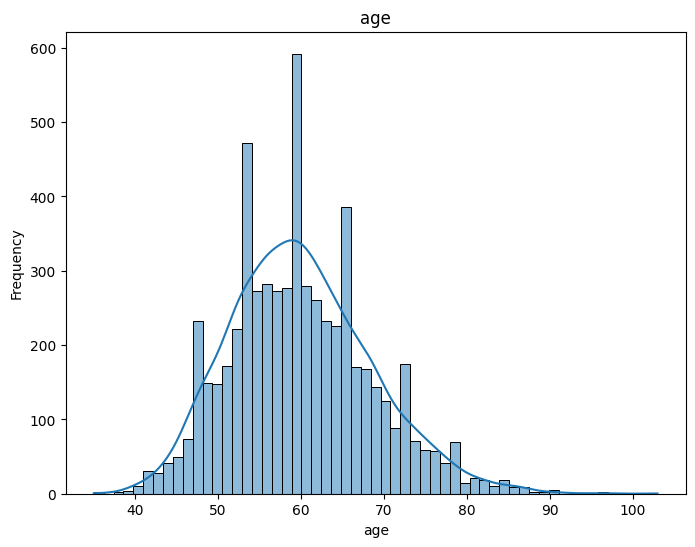

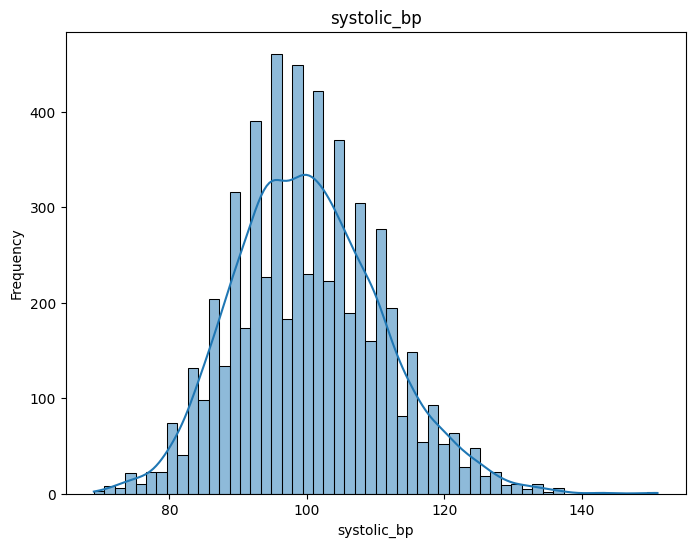

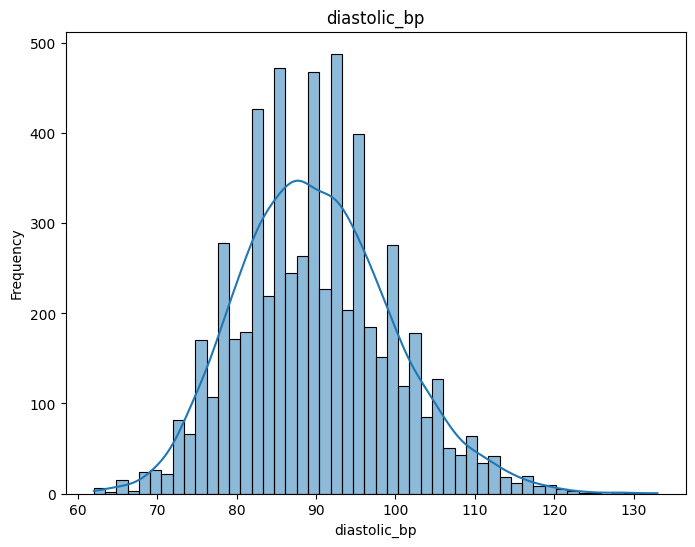

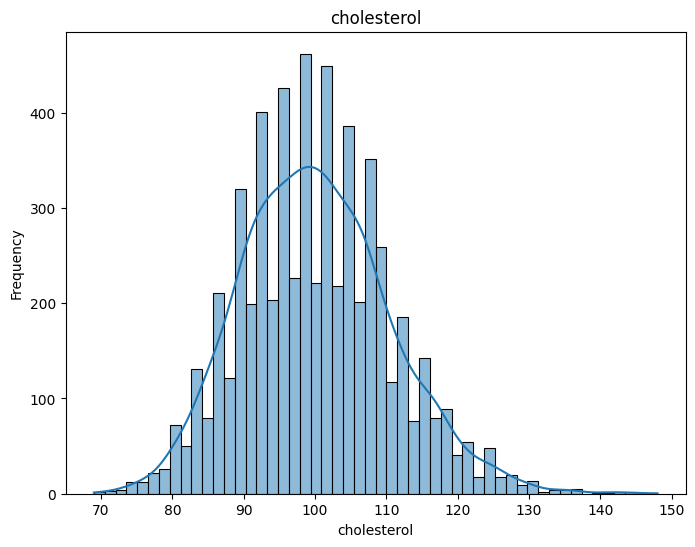

In [ ]:
# Create histograms for numerical columns


for col in df.iloc[:,:4]:  # using for loop to create hist
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
print("\nSkewness of numerical columns:")
print(df.iloc[:,:4].skew())


Skewness of numerical columns:
age             0.441397
systolic_bp     0.333012
diastolic_bp    0.334226
cholesterol     0.362547
dtype: float64


In [ ]:
# By looking histogram and skewness values for all numerical columns are relatively close to zero sugggest that data set follow normal distribution

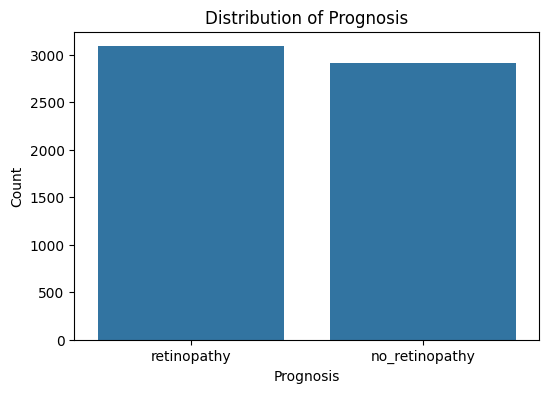

In [ ]:
# creat bar graph of prognosis (prognosis is categorical column)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='prognosis')
plt.title('Distribution of Prognosis')
plt.xlabel('Prognosis')
plt.ylabel('Count')
plt.show()

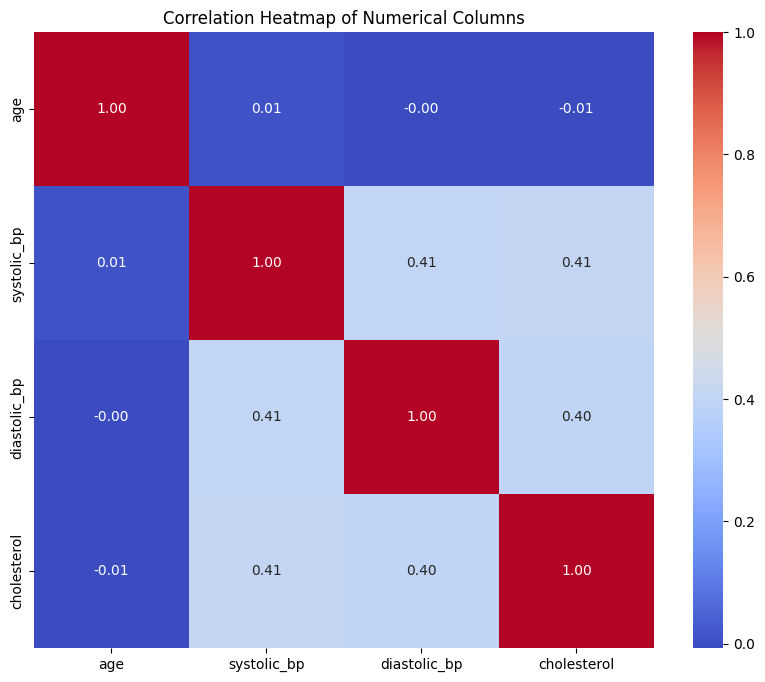

In [ ]:
# Create a heatmap of the correlation matrix of numerical columns
numerical_df = df.iloc[:, :4]
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

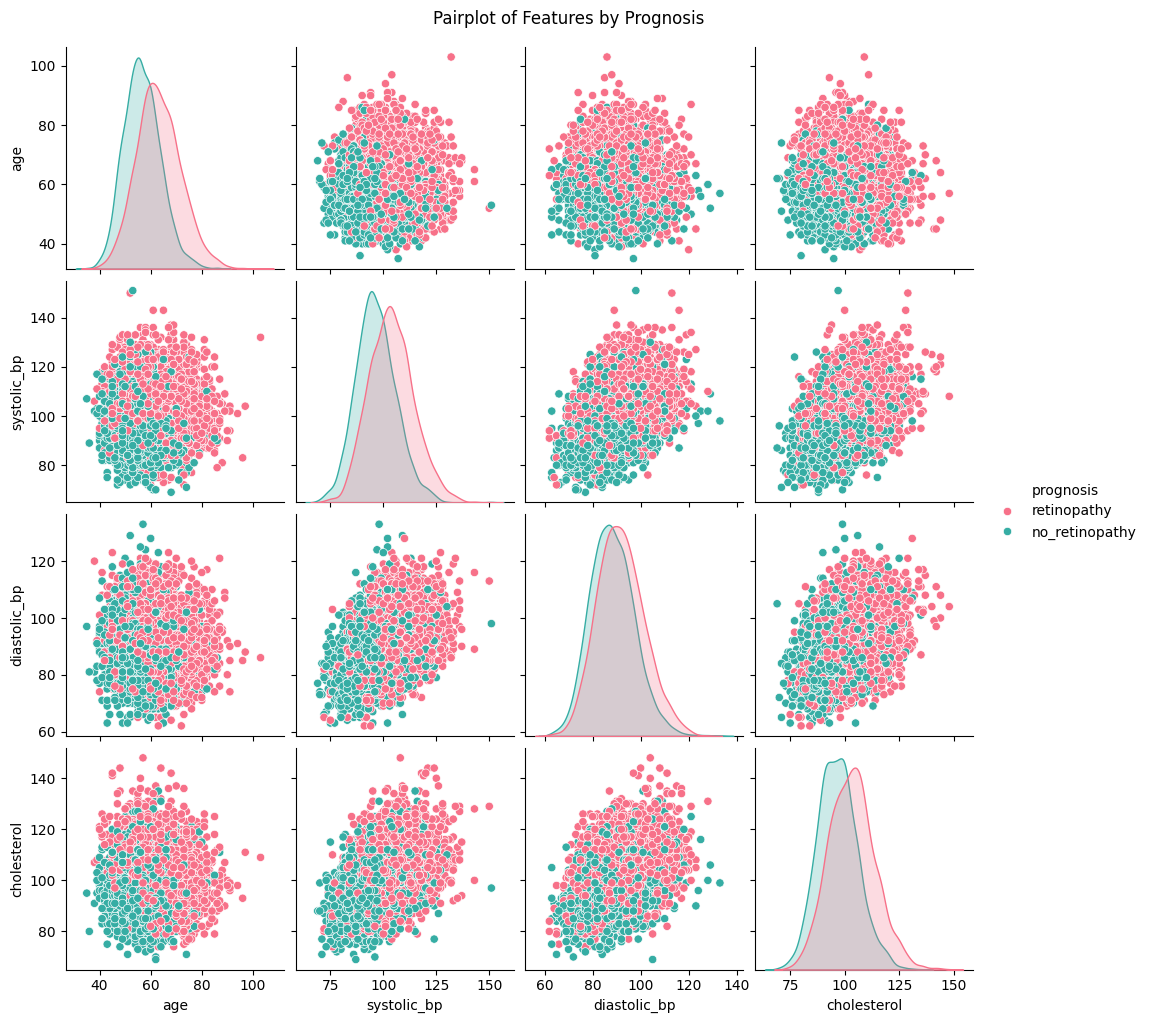

In [ ]:
sns.pairplot(df, hue='prognosis', palette='husl')
plt.suptitle("Pairplot of Features by Prognosis", y=1.02)
plt.show()


In [ ]:
# Observations from the scatter plots and Heatmap :

#  show the relationships between numerical column age, systolic_bp, diastolic_bp, and cholesterol.

# Age appears to have very weak or negligible linear correlations with systolic blood pressure, diastolic blood pressure, and cholesterol

# There seems to be a moderate positive correlation between 'systolic_bp' and 'diastolic_bp'

# Similarly, there appear to be positive correlations between 'systolic_bp' and 'cholesterol', and 'diastolic_bp' and 'cholesterol'. This suggests that higher blood pressure values might be related to higher cholesterol levels.


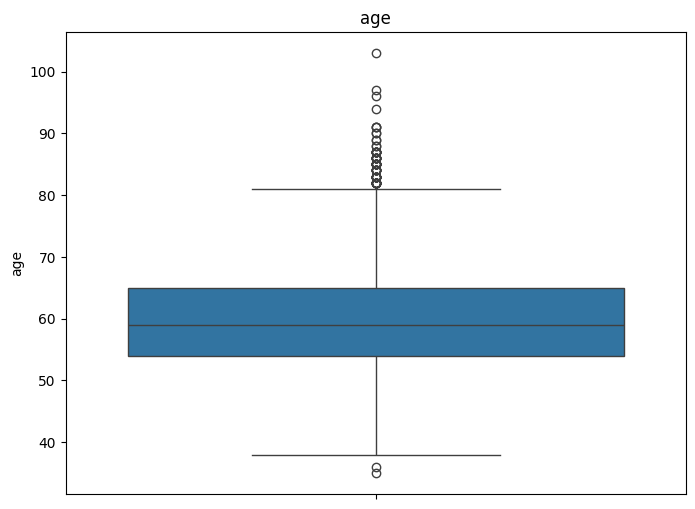

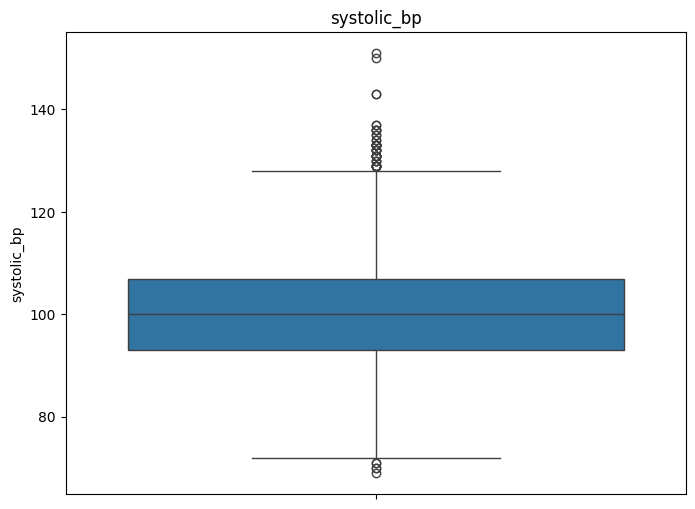

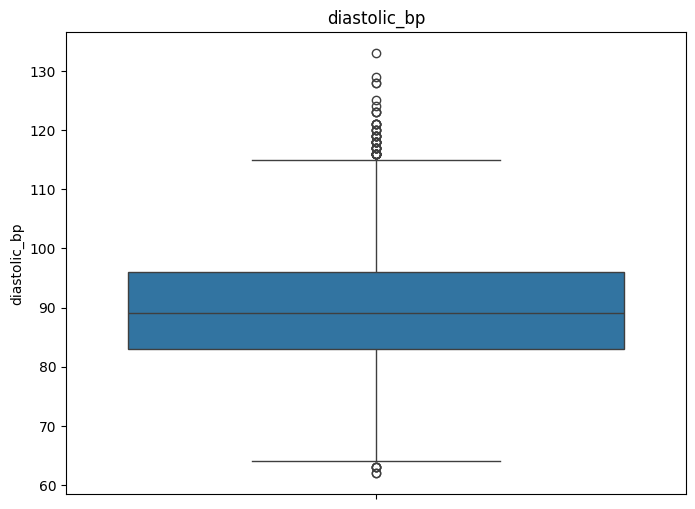

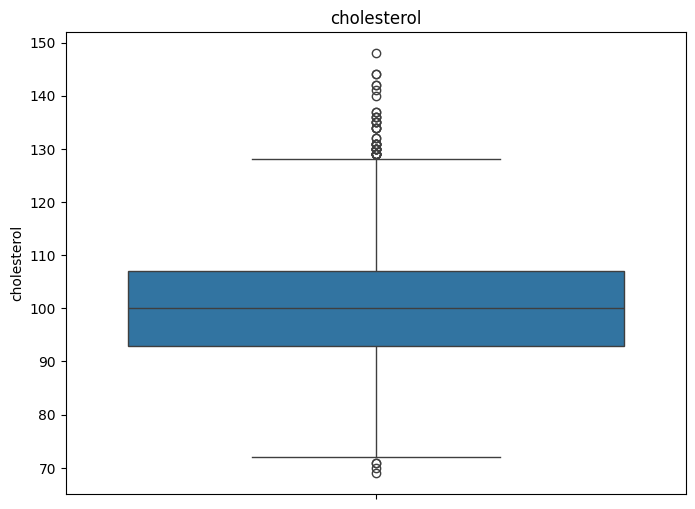

In [ ]:
# Creat Boxplot for numerical column using for loop

for col in df.iloc[:,:4]:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, y=col)
    plt.title(col)
    plt.ylabel(col)
    plt.show()

In [ ]:
# by looking at box plot showing abve 80 age people as outliers
# sytolic_bp above 120mmhg could be hypertension medical condition
#dystolic_bp should be below 80mmhg so above 110mmhg could be outliers
# cholesterol shuold be less than 200mg but showing as outliers
#  They might be statistical outliers, but they are clinically relevant.
# so outliers not removing , transform the outliers to be near the whisker length

In [ ]:
numerical_cols = ['age', 'systolic_bp', 'diastolic_bp', 'cholesterol']

In [ ]:
# Calculate IQR and whisker boundaries for numerical columns

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define whisker boundaries (1.5 * IQR rule)
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # Apply winsorizing: cap values at the whisker boundaries
    df[col] = df[col].clip(lower=lower_whisker, upper=upper_whisker)

print("DataFrame after winsorizing outliers:",df.shape)


DataFrame after winsorizing outliers: (6000, 5)


In [ ]:
# Appling Data Transformation Techniques on numerical column and categorical

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Apply Standardization on df_new
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


# Apply Label Encoding on 'prognosis' column
label_encoder = LabelEncoder()
df['prognosis'] = label_encoder.fit_transform(df['prognosis'])


print("DataFrame after data transformation:\n",df.head())


DataFrame after data transformation:
         age  systolic_bp  diastolic_bp  cholesterol  prognosis
0  2.031933    -1.437327     -1.043696    -2.047098          1
1  0.367007    -0.109630     -0.624808     0.962912          1
2  1.080547     1.028396      1.993248    -0.008059          1
3  2.567088    -0.488972     -1.148419    -1.270321          1
4  2.150856     0.838725      0.003526    -0.784836          1


In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('prognosis', axis=1)
y = df['prognosis']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (4800, 4)
Shape of X_test: (1200, 4)
Shape of y_train: (4800,)
Shape of y_test: (1200,)


In [ ]:
# our target varible is in categorical format  or in binary class so we need to apply classification model
# 1st we try model fitting with logestic regression

In [ ]:
#model fitting and prediction
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)

# Train the model with train data
model.fit(X_train, y_train)

# Make predictions on the test data and train

Y_pred_train = model.predict(X_train)
Y_pred_test= model.predict(X_test)

In [46]:
# Evaluate the model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, log_loss

accuracy = accuracy_score(y_train, Y_pred_train)
precision = precision_score(y_train, Y_pred_train)
recall = recall_score(y_train, Y_pred_train)
f1 = f1_score(y_train, Y_pred_train)
roc_auc = roc_auc_score(y_train,Y_pred_train)
logloss_train = log_loss(y_train, model.predict_proba(X_train)[:, 1])


print("Training Set Performance:")

print("Accuracy:",np.round(accuracy,2))    #it measures the overall correctness of your model
print("Precision:",np.round(precision,2))  # accuracy of the positive predictions(true positives + false positives)
print("Recall:", np.round(recall,2))        # all the actual positive cases (true positives + false negatives)
print("F1-score:", np.round(f1,2))             # metric that combines both precision and recall
print("Log Loss:", np.round(logloss_train, 4))


print('-'*40)

accuracy = accuracy_score(y_test, Y_pred_test)
precision = precision_score(y_test, Y_pred_test)
recall = recall_score(y_test, Y_pred_test)
f1 = f1_score(y_test,Y_pred_test)
roc_auc = roc_auc_score(y_test,Y_pred_test)
logloss_test = log_loss(y_test, model.predict_proba(X_test)[:, 1])


print("Testing Set Performance:")
print("Accuracy:",np.round(accuracy,2))
print("Precision:",np.round(precision,2))
print("Recall:", np.round(recall,2))
print("F1-score:", np.round(f1,2))
print("Log Loss:", np.round(logloss_test, 4))

Training Set Performance:
Accuracy: 0.74
Precision: 0.75
Recall: 0.75
F1-score: 0.75
Log Loss: 0.0026
----------------------------------------
Testing Set Performance:
Accuracy: 0.74
Precision: 0.76
Recall: 0.74
F1-score: 0.75
Log Loss: 12.1064


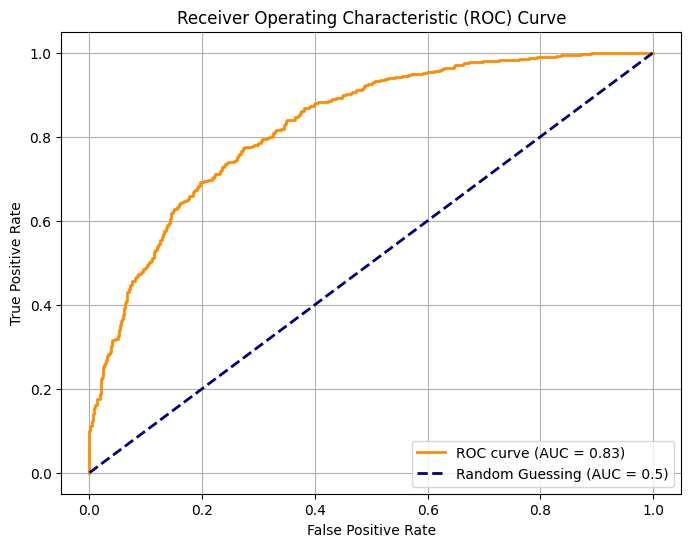

In [ ]:
#ROC AUC(Receiver Operating Characteristic - Area Under the Curve) score is a measure of a classification model's performance across all possible classification thresholds.
#visulization of Roc -Auc curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate the probabilities of the positive class
y_prob_test = model.predict_proba(X_test)[:, 1]

# Calculate the False Positive Rate (fpr) and True Positive Rate (tpr)
fpr, tpr, thresholds = roc_curve(y_test, y_prob_test)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

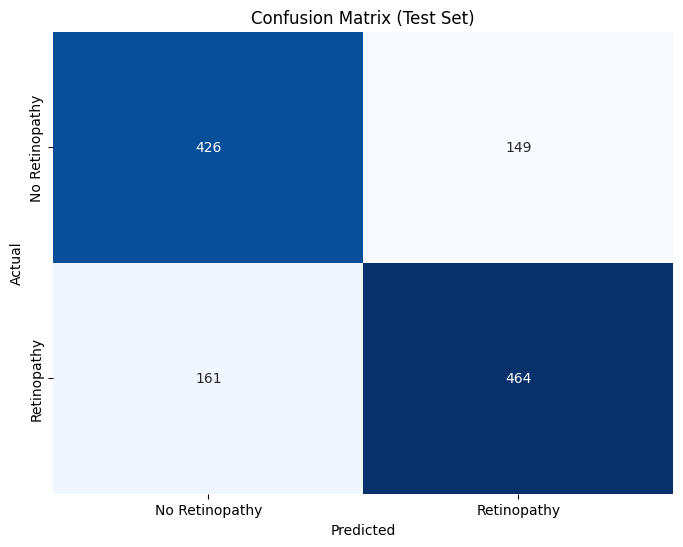

In [ ]:
#visulizaton of cunfusion matrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix for test data
conf_matrix_test = confusion_matrix(y_test, Y_pred_test)

# Plot the confusion matrix for test data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Retinopathy', 'Retinopathy'],
            yticklabels=['No Retinopathy', 'Retinopathy'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test Set)')
plt.show()

In [ ]:
# in above confusion matrics
# predicting Retinopathy: The model predicted "Retinopathy", and the patient actually had Retinopathy.(464)
                          # True Positive (TP): The model correctly predicted the class as Positive, and the actual class was also Positive

# Predicting No Retinopathy: The model predicted "No Retinopathy", and the patient actually did not have Retinopathy.(426)
                          # True Negative (TN): The model correctly predicted the class as Negative, and the actual class was also Negative


#  The model predicted "Retinopathy", but the patient actually did not have Retinopathy. (149)
    # False Positive (FP): The model incorrectly predicted the class as Positive, but the actual class was Negative. This is also known as a Type I error.



# The model predicted "No Retinopathy", but the patient actually had Retinopathy (161)
      #  False Negative (FN): The model incorrectly predicted the class as Negative, but the actual class was Positive. This is also known as a Type II error.


# Type II Error (False Negative): In classification, it's predicting a negative outcome when the actual outcome is positive.
  # This error can have more serious consequences, especially in medical diagnosis where a false negative could mean a patient with a disease is not diagnosed and treated



In [ ]:
#Performing k fold cross-validation and get both training and testing scores

from sklearn.model_selection import cross_validate
model = LogisticRegression(random_state=42)

cv_results = cross_validate(model, X, y, cv=5, scoring='accuracy', return_train_score=True) # k=5

print("Cross-validation results:\n")
print(" Train accuracy:", np.round(cv_results['train_score'].mean(), 2))
print(" Test accuracy:", np.round(cv_results['test_score'].mean(), 2)) # looking for mean accuracy



Cross-validation results:

 Train accuracy: 0.74
 Test accuracy: 0.74


In [ ]:
# by looking at performace of logestic model
# so fitting model with Decision tree classifier


In [47]:
# fitting model with decision treee
from sklearn.tree import DecisionTreeClassifier


#fit model with Train data set
model = DecisionTreeClassifier(criterion='gini') # gini is used for varible selection (add more priority varible accordingly)
                                                             # max depth used to controll depth of nodes (puring) remove node from bottom
model.fit(X_train,y_train)

Y_decision_train = model.predict(X_train)
Y_decision_test = model.predict(X_test)

#Model Evaluation by evaluation metrics

accuracy  = accuracy_score(y_train,Y_decision_train)
precision = precision_score(y_train, Y_decision_train)
recall = recall_score(y_train, Y_decision_train)
f1 = f1_score(y_train,Y_decision_train)
logloss_train_dt = log_loss(y_train, model.predict_proba(X_train)[:, 1])


print("Training Decision Tree Performance:")
print("Accuracy:", np.round(accuracy,2))
print("Precision:",np.round(precision,2))
print("Recall:", np.round(recall,2))
print("Log Loss:", np.round(logloss_train_dt, 4))


print('-'*40)

accuracy  = accuracy_score(y_test,Y_decision_test)
precision = precision_score(y_test, Y_decision_test)
recall = recall_score(y_test, Y_decision_test)
f1 = f1_score(y_test,Y_decision_test)
logloss_test_dt = log_loss(y_test, model.predict_proba(X_test)[:, 1])


print("Testing Decision Tree Performance:")
print("Accuracy:",np.round(accuracy,2))
print("Precision:",np.round(precision,2))
print("Recall:", np.round(recall,2))
print("Log Loss:", np.round(logloss_test_dt, 4))

Training Decision Tree Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Log Loss: 0.0026
----------------------------------------
Testing Decision Tree Performance:
Accuracy: 0.66
Precision: 0.67
Recall: 0.67
Log Loss: 12.1965


In [ ]:
# count the total number of nodes and depth of the tree from above

from sklearn.tree import DecisionTreeClassifier

n_nodes = model.tree_.node_count
depth = model.tree_.max_depth

print(f"Number of nodes: {n_nodes}")
print(f"Depth of the tree: {depth}")


Number of nodes: 2801
Depth of the tree: 24


In [ ]:
# performing cross validation (k fold)
from sklearn.model_selection import cross_validate

model_dt = DecisionTreeClassifier(criterion='gini',max_depth=8, random_state=42) # take max-depth parameter to controll over fitting

cv_results_dt = cross_validate(model_dt, X, y, cv=5, scoring='accuracy', return_train_score=True)

print("Cross-validation results for Decision Tree:\n")

print("Train accuracy:", np.round(cv_results_dt['train_score'].mean(), 2))
print("Test accuracy:", np.round(cv_results_dt['test_score'].mean(), 2))

Cross-validation results for Decision Tree:

Train accuracy: 0.79
Test accuracy: 0.72


In [ ]:
#Try with support vector machine model with different kernal and parameters with help of gridsearch cv

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for SVM
param_grid_svm = [
    {'kernel': ['linear'], 'C': [0.1, 1, 10, 100]}, # Linear kernel with different regularization values
    {'kernel': ['rbf'], 'gamma': [0.1, 1, 10, 100]}, # RBF kernel with different gamma values
    {'kernel': ['poly'], 'degree': [2, 3, 4], 'C': [0.1, 1, 10, 100]} # Polynomial kernel with different degrees and C values
]


svm_model = SVC(random_state=42)
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1, return_train_score=True)

grid_search_svm.fit(X_train, y_train)

print("Best parameters found for SVM:", grid_search_svm.best_params_)
print("Best cross-validation Test accuracy for SVM:", np.round(grid_search_svm.best_score_, 2))



Best parameters found for SVM: {'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation Test accuracy for SVM: 0.75


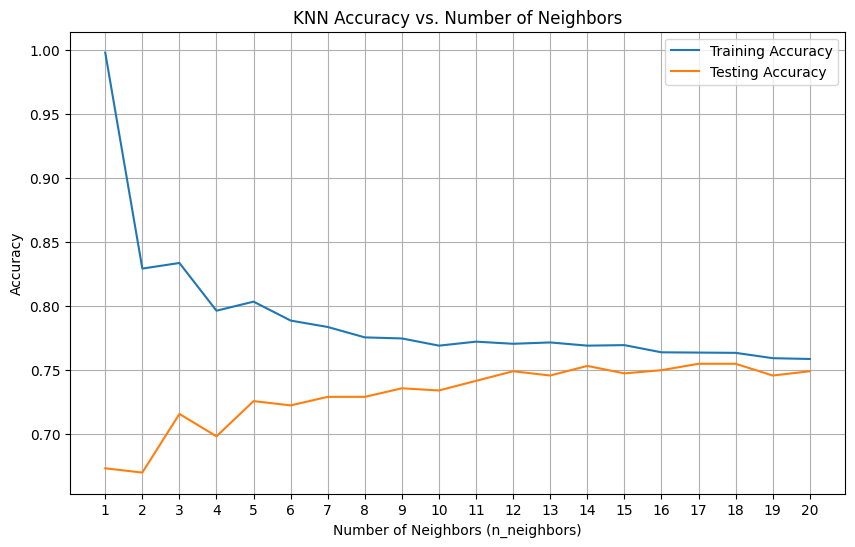

Optimal K value  based on test accuracy: 17


In [ ]:
#try with K-Nearest Neighbors model

from sklearn.neighbors import KNeighborsClassifier

# Try with different k value from 1 to 20 ranges and store accuracy in empty list
train_accuracies = []
test_accuracies = []
n_neighbors_range = range(1, 21)

# Iterate through different values of n_neighbors
for n in n_neighbors_range:
    knn_model = KNeighborsClassifier(n_neighbors=n)
    knn_model.fit(X_train, y_train)

    y_train_pred_knn = knn_model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred_knn)
    train_accuracies.append(train_accuracy)

    y_test_pred_knn = knn_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred_knn)
    test_accuracies.append(test_accuracy)

# Plot the accuracy scores
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_range, train_accuracies, label='Training Accuracy')
plt.plot(n_neighbors_range, test_accuracies, label='Testing Accuracy')
plt.title('KNN Accuracy vs. Number of Neighbors')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Accuracy')
plt.xticks(n_neighbors_range)
plt.legend()
plt.grid(True)
plt.show()

# Find the optimal n_neighbors value based on the highest test accuracy
optimal_n_neighbors = n_neighbors_range[np.argmax(test_accuracies)]
print(f"Optimal K value  based on test accuracy: {optimal_n_neighbors}")

In [48]:

# Train the KNN model with the optimal number of neighbors
optimal_K_value = 11 # Based on the previous plot
knn_model_optimal = KNeighborsClassifier(n_neighbors=optimal_K_value)

# Train the model and make predection
knn_model_optimal.fit(X_train, y_train)

y_train_pred_knn= knn_model_optimal.predict(X_train)
y_test_pred_knn = knn_model_optimal.predict(X_test)


# Evaluate the model performance

accuracy = accuracy_score(y_train, y_train_pred_knn)
precision = precision_score(y_train, y_train_pred_knn)
recall = recall_score(y_train, y_train_pred_knn)
f1 = f1_score(y_train, y_train_pred_knn)
logloss_train_knn = log_loss(y_train, knn_model_optimal.predict_proba(X_train)[:, 1])

print(f"Training Set Performance (KNN with optimal n_neighbors={optimal_n_neighbors}):")
print("Accuracy:", np.round(accuracy, 2))
print("Precision:", np.round(precision, 2))
print("Recall:", np.round(recall, 2))
print("Log Loss:", np.round(logloss_train_knn, 4))


print('-'*40)

accuracy= accuracy_score(y_test, y_test_pred_knn)
precision = precision_score(y_test, y_test_pred_knn)
recall = recall_score(y_test, y_test_pred_knn)
f1 = f1_score(y_test, y_test_pred_knn)
logloss_test_knn = log_loss(y_test, knn_model_optimal.predict_proba(X_test)[:, 1])


print(f"Testing Set Performance (KNN with optimal k value =11):")
print("Accuracy:", np.round(accuracy, 2))
print("Precision:", np.round(precision, 2))
print("Recall:", np.round(recall, 2))
print("Log Loss:", np.round(logloss_test_knn, 4))


# perform KFold cross-validator
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

optimal_K_value = 11  # Based on the previous plot
knn_model = KNeighborsClassifier(n_neighbors=optimal_K_value)

# Perform cross-validation
cv_scores_knn = cross_val_score(knn_model, X, y, cv=kf, scoring='accuracy')

print("\n cross-validation accuracy for KNN:", np.round(cv_scores_knn.mean(), 2))

Training Set Performance (KNN with optimal n_neighbors=17):
Accuracy: 0.77
Precision: 0.78
Recall: 0.78
Log Loss: 0.455
----------------------------------------
Testing Set Performance (KNN with optimal k value =11):
Accuracy: 0.74
Precision: 0.74
Recall: 0.77
Log Loss: 0.8783

 cross-validation accuracy for KNN: 0.73


In [49]:
# Try with  Naive bayes model

from sklearn.naive_bayes import GaussianNB  # GaussianNB variant is used for continuous data and handle standardized data

naive_bayes_model = GaussianNB()

# Train the model and Make predictions
naive_bayes_model.fit(X_train, y_train)

y_train_pred_nb = naive_bayes_model.predict(X_train)
y_test_pred_nb = naive_bayes_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_train, y_train_pred_nb)
precision = precision_score(y_train, y_train_pred_nb)
recall = recall_score(y_train, y_train_pred_nb)
f1 = f1_score(y_train, y_train_pred_nb)
logloss_train_nb = log_loss(y_train, naive_bayes_model.predict_proba(X_train)[:, 1])


print("Training Set Performance (Naive Bayes):")
print("Accuracy:", np.round(accuracy, 2))
print("Precision:", np.round(precision , 2))
print("Recall:", np.round(recall , 2))
print("Log Loss:", np.round(logloss_train_nb, 4))


print('-'*40)

accuracy = accuracy_score(y_test, y_test_pred_nb)
precision= precision_score(y_test, y_test_pred_nb)
recall = recall_score(y_test, y_test_pred_nb)
f1 = f1_score(y_test, y_test_pred_nb)
logloss_test_nb = log_loss(y_test, naive_bayes_model.predict_proba(X_test)[:, 1])


print("Testing Set Performance (Naive Bayes):")
print("Accuracy:", np.round(accuracy, 2))
print("Precision:", np.round(precision, 2))
print("Recall:", np.round(recall, 2))
print("Log Loss:", np.round(logloss_test_nb, 4))


# perform  KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
naive_bayes_model = GaussianNB()

# Perform cross-validation
cv_scores_nb = cross_val_score(naive_bayes_model, X, y, cv=kf, scoring='accuracy')

print("\ncross-validation accuracy for Naive Bayes:", np.round(cv_scores_nb.mean(), 2))

Training Set Performance (Naive Bayes):
Accuracy: 0.73
Precision: 0.76
Recall: 0.71
Log Loss: 0.5389
----------------------------------------
Testing Set Performance (Naive Bayes):
Accuracy: 0.74
Precision: 0.77
Recall: 0.72
Log Loss: 0.5286

cross-validation accuracy for Naive Bayes: 0.73


In [50]:
print("""
Logistic Regression:
Testing Accuracy: 0.73
Cross-validation Test Accuracy: 0.74

Decision Tree:
Testing Accuracy (initial model): 0.66 # This model showed signs of overfitting.
Cross-validation Test Accuracy (with max_depth=8): 0.72

Support Vector Machine (SVM) with RBF kernel :
Best Cross-validation Test Accuracy: 0.74

K-Nearest Neighbors (KNN):
Testing Accuracy (with optimal k=11): 0.74
Cross-validation Accuracy (with optimal k=11): 0.73

Naive Bayes:
Testing Accuracy: 0.73
Cross-validation Accuracy: 0.73

Based on these accuracies, the Logistic Regression, SVM, and KNN models with optimal parameters appear to have slightly better
 or comparable performance to the Decision Tree and Naive Bayes models on the test and cross-validation sets.

""")


Logistic Regression:
Testing Accuracy: 0.73
Cross-validation Test Accuracy: 0.74

Decision Tree:
Testing Accuracy (initial model): 0.66 # This model showed signs of overfitting.
Cross-validation Test Accuracy (with max_depth=8): 0.72

Support Vector Machine (SVM) with RBF kernel :
Best Cross-validation Test Accuracy: 0.74

K-Nearest Neighbors (KNN):
Testing Accuracy (with optimal k=11): 0.74
Cross-validation Accuracy (with optimal k=11): 0.73

Naive Bayes:
Testing Accuracy: 0.73
Cross-validation Accuracy: 0.73

Based on these accuracies, the Logistic Regression, SVM, and KNN models with optimal parameters appear to have slightly better
 or comparable performance to the Decision Tree and Naive Bayes models on the test and cross-validation sets.




In [ ]:
print("""
The accuracy of any model is upto 75%
Main difficulty seems to be that this the provided features do not strongly differentiate between the two classes
The features in this dataset not helping to detect for accurately predicting retinopathy
maybe due to Weak Correlations between the numerical features,Limited Set of Features might inclued by various factors, including duration of diabetes, blood sugar control (HbA1c levels), genetics, other medical conditions
""")


The accuracy of any model is upto 75% 
Main difficulty seems to be that this the provided features do not strongly differentiate between the two classes
The features in this dataset not helping to detect for accurately predicting retinopathy
maybe due to Weak Correlations between the numerical features,Limited Set of Features might inclued by various factors, including duration of diabetes, blood sugar control (HbA1c levels), genetics, other medical conditions 

